# Metropolis Hastings

## Part A: MH Proposals and Acceptance Probabilities

> *Starting with a very general notation...*

Accepting draws from a ***proposal distribution***

$\tilde x^{(t)} \sim q(\tilde x^{(t)}|x^{(t-1)})$

according to a "coin flip"

$x^{(t)} = \left\{\begin{array}{ll}
\tilde x^{(t)} & \text{with probability } \min\left(1,\frac{p(\tilde x^{(t)})}{p(x^{(t-1)})}\frac{q(x^{(t-1)}|\tilde x^{(t)})}{q(\tilde x^{(t)}|x^{(t-1)})}\right) \quad \color{gray}{\begin{array}{c}\textrm{... is the normalizing constant needed for $p$?}\\\textrm{... and what happens if $q$ is symmetric?}  \end{array}}\\
x^{(t-1)} & \text{otherwise}
\end{array}\right.$

will produce draws from $p(x^{(t)})$.

### This is a two step conditional process<br>which altogether defines a <u>transition distribution</u>

$
\begin{align*}
&\quad\, \Pr(\textrm{accept}|\textrm{proposal},\textrm{current state}) q(\textrm{proposal}|\textrm{current state})\\
&={}
\Pr(\textrm{accept}|\textrm{proposal}) p(\textrm{proposal}|\textrm{current state})\\
&={} \Pr(x^{(t)} = \tilde x^{(t)}) q(\tilde x^{(t)}|x^{(t-1)}) = p(\tilde x^{(t)}|x^{(t-1)})
\end{align*}
$

so $q(\tilde x^{(t)}|x^{(t-1)})$ is our **proposal distribuiton** but $p(\tilde x^{(t)}|x^{(t-1)})$ is our actual **transition distribuiton**

### Does it work?

Let's see for

$
\begin{align*}
p(x^{(t)}) & \rightarrow {} N(0,1)\\
q(\tilde x^{(t)}|x^{(t-1)}) & \rightarrow {} N(x^{(t-1)},\sigma)
\end{align*}
$


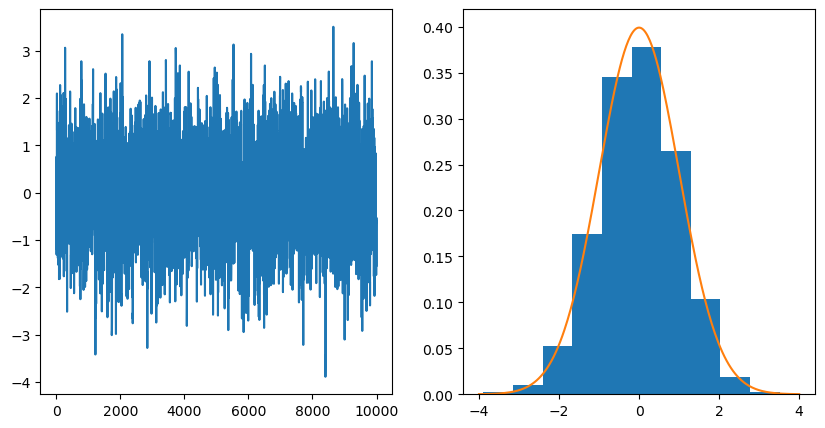

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

p_x_pdf = lambda x: stats.norm().pdf(x)
mh_tuning_parameter = 1.5
q_xt_given_xtm1 = lambda x: stats.norm(x, scale=mh_tuning_parameter)
proposal_distribution = q_xt_given_xtm1

m = 10000
x = np.zeros(m)
rejections = 0
for t in range(1,m):
    x_tilde = proposal_distribution(x[t-1]).rvs()
    acceptance_probability = min(1, p_x_pdf(x_tilde)/p_x_pdf(x[t-1]))
    if stats.uniform().rvs() < acceptance_probability:
        x[t] = x_tilde
    else:
        x[t] = x[t-1]
        rejections += 1

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(x)
ax[1].hist(x, density=True)
x_support = np.linspace(-4,4,301)
ax[1].plot(x_support, p_x_pdf(x_support));

## Part B: What is MH?


### Why doesn't this work?


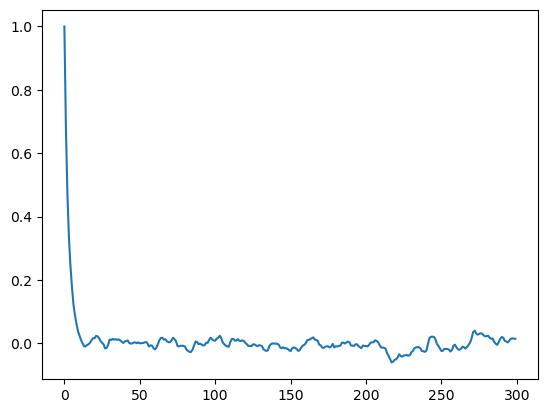

In [ ]:
K = 300
autocorrelations = np.ones(K)
for t_plus_k in range(1, K):
    autocorrelations[t_plus_k] = np.corrcoef(x[:-t_plus_k], x[t_plus_k:])[0,1]

plt.plot(autocorrelations);

### Effective sample size

$$n_{\text{eff}} = \frac{m}{\sum_{k=-\infty}^\infty\rho_k} = \frac{m}{1+2\sum_{k=1}^\infty\rho_k} \quad \text{ for order $k$ autocorrelations } \quad \rho_k $$

which is based on the relative value of $m$ between
- $\textrm{Var}\left(\frac{1}{n}{\sum_{t=1}^n x^{(t)}}\right) = \frac{\sigma^2}{n}$ under i.i.d. sampling and the actual
- $\begin{align}\textrm{Var}\left(\frac{1}{m}\sum_{t=1}^m x^{(t)}\right) &={} \frac{1}{m^2}\left(\sum_{t=1}^m \textrm{Var}\left(x^{(t)}\right) + \sum_{t \neq t'} \textrm{Cov}(x^{(t)},x^{(t')})\right)\\ &={} \frac{1}{m^2}\left(m \sigma^2 + \sum_{t \neq t'} \sigma^2 \rho_{t,t'}\right)\\ &\approx{} \frac{1}{m^2}\left(m \sigma^2+2m \sigma^2 \sum_{k=1}^m\rho_k\right) \approx \frac{\sigma^2}{m}\left(1+2  \sum_{k=1}^\infty\rho_k\right) \end{align}$
- Now call $n\rightarrow n_{\textrm{eff}}$ and solve for $n_{\textrm{eff}}$ in $\frac{\sigma^2}{n_{\textrm{eff}}} = \frac{\sigma^2}{m}\left(1+2  \sum_{k=1}^\infty\rho_k\right)$ which gives our result showing what our dependent samples would have counted for relative to an i.i.d. sample size count


In [ ]:
n_eff s2 = m s2 + 2ms2 Sum r
n_eff = m + 2m  Sum r

m*m/n_eff = m/(1+ 2  Sum r)



In [ ]:
m / (1 + 2*autocorrelations[1:100].sum())

153.46195065022576

(13, 1806.2389367165658)

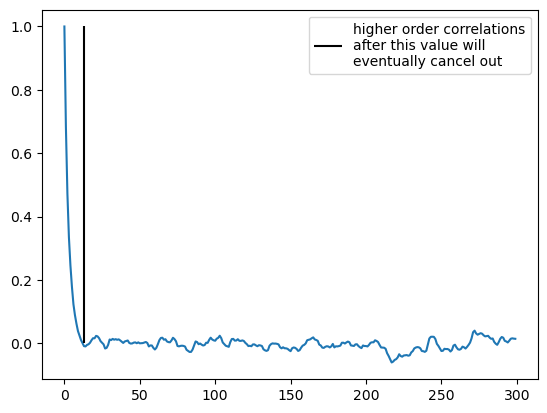

In [ ]:
K = 300
autocorrelations = np.ones(K)
for t_plus_k in range(1, K):
    autocorrelations[t_plus_k] = np.corrcoef(x[:-t_plus_k], x[t_plus_k:])[0,1]

approximation_stop = (autocorrelations < 0).cumsum()
approximation_stop = approximation_stop*np.arange(K)
approximation_stop = min(approximation_stop[approximation_stop>0])

plt.plot(autocorrelations)
plt.vlines(approximation_stop, ymin=0, ymax=1, color='k',
           label='higher order correlations\nafter this value will\neventually cancel out')
plt.legend()

# effective sample size
approximation_stop, m / (1 + 2*autocorrelations[1:approximation_stop].sum())

In [ ]:
10000/14

714.2857142857143

### Rejection Rate

The **rejection rate** of the **Metropolis Hastings** algorithm given above is something else that we should keep in mind.

#### Q1: Is a high rejection rate benefiicial or detrimental for the effective sample size calculation?

#### Q2: What is the relationship between the proposal distribution and the rejection rate?

In [ ]:
rejections/m

0.418

### Why does this work?

> *Changing and hinting with the the notation to begin being suggestive about our purposes...*

If we have a **stationary distribution** $p(\theta \color{gray}{|x})$ then **transition distribution (kernel)** $p$ (not to be confused with the **Metropolis-Hastings prposal distribution** $q$!) produces a sample from this **stationary distribution** if the ***Markov chain*** it produces is ***reversible***, meaning that

$\require{cancel}
\begin{align*}
p(\theta^{(t)}|\theta^{(t-1)})p(\theta^{(t-1)}\color{gray}{|x}) & = {}  p(\theta^{(t-1)}|\theta^{(t)})p(\theta^{(t)}\color{gray}{|x})\\\\
& \textrm{But is this true if we use a Metropolis-Hastings transition distribution (kernel)?}
\\\\
p(\theta^{(t)}\color{gray}{|x}) & \overset{MH}{=} {} \frac{\alpha_{\textrm{accept prob}}^{\textrm{forward}} q(  \theta^{(t)}| \theta^{(t-1)})}{\alpha_{\textrm{accept prob}}^{\textrm{backward}} q(  \theta^{(t-1)}|\theta^{(t)})}p(\theta^{(t-1)}\color{gray}{|x})\\
p( \theta^{(t)}\color{gray}{|x}) & = {} \frac{\min\left(1,\frac{p( \theta^{(t)}\color{gray}{|x})}{p(\theta^{(t-1)}\color{gray}{|x})}\frac{q(\theta^{(t-1)}| \theta^{(t)})}{q( \theta^{(t)}|\theta^{(t-1)})}\right) q( \theta^{(t)}|\theta^{(t-1)})}{\min\left(1,\frac{p( \theta^{(t-1)}\color{gray}{|x})}{p( \theta^{(t)}\color{gray}{|x})}\frac{q( \theta^{(t)}| \theta^{(t-1)})}{q( \theta^{(t-1)}| \theta^{(t)})}\right) q(  \theta^{(t-1)}|\theta^{(t)})}p(\theta^{(t-1)}\color{gray}{|x})\\\\
& \textrm{The fractions in the "$\min$" in the numerator or denomenator are reciprocals}\\
& \textrm{thus regardless of if the numerator fraction is equal to, greater than, or less than $1$}\\\\
p( \theta^{(t)}\color{gray}{|x}) & = {} \frac{p( \theta^{(t)}\color{gray}{|x})}{p(\theta^{(t-1)}\color{gray}{|x})}\frac{q(\theta^{(t-1)}| \theta^{(t)})}{q( \theta^{(t)}|\theta^{(t-1)})} \frac{q\theta^{(t)}|\theta^{(t-1)})}{q(\theta^{(t-1)}|\theta^{(t)})}p(\theta^{(t-1)}\color{gray}{|x}) \\\\
\xcancel{p( \theta^{(t)}\color{gray}{|x})} & = {} \frac{\xcancel{p(\theta^{(t)}\color{gray}{|x})}}{\xcancel{p(\theta^{(t-1)}\color{gray}{|x})}}\frac{\cancel{q(\theta^{(t-1)}| \theta^{(t)})}}{\cancel{q( \theta^{(t)}|\theta^{(t-1)})}} \frac{\cancel{q\theta^{(t)}|\theta^{(t-1)})}}{\cancel{q(\theta^{(t-1)}|\theta^{(t)})}}\xcancel{p(\theta^{(t-1)}\color{gray}{|x})}\\  \longrightarrow \quad 1 & ={} 1 \quad \textrm{ so the equation is true and reversibility holds}
\end{align*}$

This illustrates how the entire design and purpose of the **Metropolis-Hastings** algorithm specification (which seemingly appeared magically out of thin air) is in fact based on "reverse engineering" (if you will please excuse the pun) exactly what is needed to create a **reversible Markov Chain** (whose **stationary distribution** is the **target** of the **Metropolis-Hastings** algorithm).

## Part C: Back to Gibbs sampling

**Gibbs sampling** also creates a **reversible Markov Chain** whereby the samples, forwards or backwards, are from the same **stationary distribution** (which is the **joint posterior distribution** of the (random variable) parameters of the **full conditional (posterior) distributions**


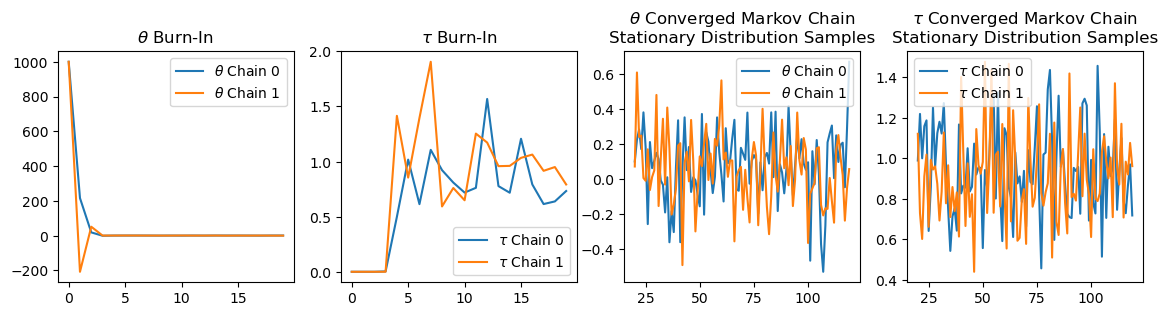

In [ ]:
# loc is mean and scale is standard deviation
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
for c in range(C):
    for g in range(1,G):
        # https://en.wikipedia.org/wiki/Gamma_distribution
        tau[c,g] = \
        stats.gamma(a=n/2+1,
                    scale=2/((x-theta[c,g-1])**2).sum()).rvs()
        theta[c,g] = \
        stats.norm(x.mean(),
                   scale=1/np.sqrt(tau[c,g]*n)).rvs()

fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend();

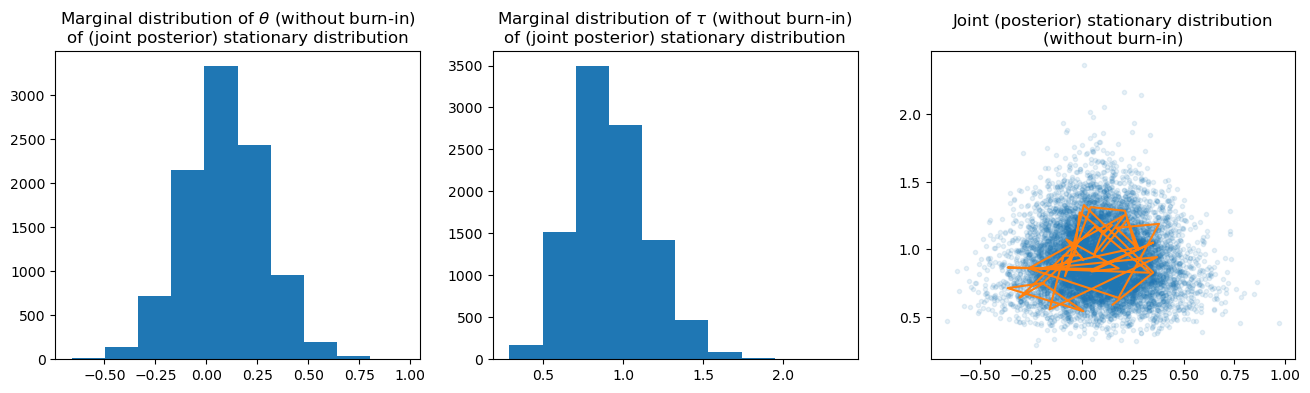

In [ ]:
fig,ax = plt.subplots(1, 3, figsize=(16,4))
ax[0].set_title("Marginal distribution of $\\theta$ (without burn-in)\nof (joint posterior) stationary distribution")
ax[1].set_title("Marginal distribution of $\\tau$ (without burn-in)\nof (joint posterior) stationary distribution")
ax[2].set_title("Joint (posterior) stationary distribution\n(without burn-in)")

ax[0].hist(theta[0,burn:])
ax[1].hist(tau[0,burn:])
ax[2].plot(theta[0,burn:], tau[0,burn:], '.', alpha=0.1);
demo = 3*burn
ax[2].plot(theta[0,burn:demo], tau[0,burn:demo]);

## Metropolis within Gibbs

1. All **full conditional distributions** are proportional to the **joint**.
2. A **Metropolis-Hastings** step can sample from a **full conditional** by proposing a sample and accepting it according to the MH acceptance probability.
3. The target density in the MH acceptance probability appears in the numerator and denomenator so it's normalizing constants cancel and all that's needed

Accepting draws from a ***proposal distribution***

$\tilde \theta^{(t)} \sim q(\tilde \theta^{(t)}|\theta^{(t-1)})$

according to

$\require{cancel}
\theta^{(t)} = \left\{\begin{array}{ll}
\tilde \theta^{(t)} & \text{with probability } \min\bigg(1,\frac{p(\tilde \theta^{(t)}|\tau^{(t)},\mathbf{x})}{p(\theta^{(t-1)}|\tau^{(t)},\mathbf{x})}\overset{\textrm{if symmetric}}{\cancel{\frac{q(\theta^{(t-1)}|\tilde \theta^{(t)})}{q(\tilde \theta^{(t)}|\theta^{(t-1)})}}^1}\bigg) \\
\theta^{(t-1)} & \text{otherwise}\\\\
\end{array}\right.$

will produce draws from $p(\theta^{(t)}|\tau^{(t)},\mathbf{x})$.

If we don't know the **full conditional distributions** *analytically* we can't use the *simple version* of **Gibbs sampling**. *But we do know the full conditional distributions proportionally up to their normalizing constants* and the unknown normalizing constants cancel in the target density ratios

$\frac{p(\tilde \theta^{(t)}|\tau^{(t)},\mathbf{x})}{p(\theta^{(t-1)}|\tau^{(t)},\mathbf{x})} = \frac{p(\tilde \theta^{(t)},\tau^{(t)},\mathbf{x})}{p(\theta^{(t-1)},\tau^{(t)},\mathbf{x})} = \frac{p(\mathbf{x}|\tilde \theta^{(t)},\tau^{(t)})p(\tilde \theta^{(t)})}{p(\mathbf{x}|\theta^{(t-1)},\tau^{(t)})p(\theta^{(t-1)})}$

so all we need is the **joint distribuiton** (as a function of the parameter of the **full conditional**, here $\theta$).

And an analogous **Metropolis within Gibbs** step exists for $\tau^{(t)}$.


In [1]:
# loc is mean and scale is standard deviation
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
for c in range(C):
    for g in range(1,G):

        # the likelihood*prior as a function of tau
        # is proportional to the full conditional of tau
        # all of which are proportion to the joint as a function of tau
        tau_target = lambda tau_: np.prod(stats.norm(loc=theta[c,g-1],
                                                     scale=1/(tau_)**0.5).pdf(x))*\
                                  stats.expon(scale=1).pdf(tau_)
                                  # arbitrarily chosen tau prior
        # arbitrarily chosen MH prosal distribution for tau
        tau_propsal = stats.expon(scale=2)
        tau_tilde = tau_propsal.rvs()

        mh_calc = (tau_target(tau_tilde)/tau_target(tau[c,g-1]))*\
        (tau_propsal.pdf(tau[c,g-1])/tau_propsal.pdf(tau_tilde)
        acceptance_probability = min(1, mh_calc)
        if stats.uniform().rvs() < acceptance_probability:
            tau[c,g] = tau_tilde
        else:
            tau[c,g] = tau[c,g-1]

        theta[c,g] = joint * prior_theta


SyntaxError: '(' was never closed (<ipython-input-1-253134f4205c>, line 21)

## Homework

---

### Q1

Convert your **Gibbs sampler** from the previous homework to be a **Metropolis within Gibbs** sampler.
- Do not derive any full conditionals and instead just use the joint distribution which is the product of the likelihood with the priors
    - Note that in fact you must only be proportional to the joint since irrelevant priors of "the other parameter" will cancel in the ratio
- Note that $\tau$ must be positive so proposals $\tilde \tau$ must also be positive. The easiest way to achieve this would be to use independent samples (that do not depend on $\tau^{(t-1)}$ from exponential, half normal, gamma, or inverse gamma distributions (and other distributions defining strictly positive random variables).
- When considering using independent proposal distributions one option of some note is to use the prior $p(\tau)$ as this proposal distribution

*Clearly articulate your specification and provide a demonstration showing the Bayesian inference it provides, in contrast to that of your previous Gibbs sampler (of Q2 from the last homework).*

### Q2

Adjust your **Metropolis within Gibbs** sampler as follows.

- Use the following **dependent** proposal for $\tau$

```Python
stats.truncnorm(a=-tau_t_minus_1/s, b=np.inf,
                loc=tau_t_minus_1, scale=s)
```

- Use a prior for $\theta$ that is not a normal distribution


*Provide a demonstration showing the Bayesian inference provided by this sampler. Then discuss the necessity (or lackthereof) of analytically determining the full conditional distributions when performing Gibbs sampling.*

### Q3

For **Metropolis Hastings** targetting (**stationary distribution**) $p$ based on proposal distribuiton $q$ given below

$\begin{align}
q(\tilde x^{(t)} | x^{(t-1)}) &={} \left(\frac{1}{2}\right)^{1-{\tilde x^{(t)}}}\left(\frac{1}{2}\right)^{\tilde x^{(t)}} \quad \color{gray}{\textrm{ ... does } \quad \frac{q(x^{(t-1)}|\tilde x^{(t)})}{q(\tilde x^{(t)}|x^{(t-1)})} \quad  \textrm{ cancel?}}\\
\textrm{and} \quad p(x^{(t)}) &={} \left(\frac{1}{3}\right)^{1-{x^{(t)}}}\left(\frac{2}{3}\right)^{x^{(t)}}\\
\end{align}$

<u>show that</u> the **transition kernel** $K$ of transition probabilities is defined the **Metropolis Hastings** algorithm is

$K = \left[\begin{array}{cc}\Pr(x^{(t)}=0 \rightarrow x^{(t+1)}=0) & \Pr(x^{(t)}=1 \rightarrow x^{(t+1)}=0)\\\Pr(x^{(t)}=0 \rightarrow x^{(t+1)}=1)& \Pr(x^{(t)}=1 \rightarrow x^{(t+1)}=1)\end{array}\right] = \left[\begin{array}{cl} 0.5 & 0.25 \\ 0.5 & 0.75 \end{array}\right]$

> For example
>
> $\begin{align}
\Pr(s_1 \rightarrow s_1) &={}
q(\tilde x^{(t)}=1 | x^{(t-1)}=1) + q(\tilde x^{(t)}=0 | x^{(t-1)}=1) \left(1- \frac{p(\tilde x^{(t)}=0)}{p(x^{(t-1)}=1)}\right)\\
&={} 1/2 + (1/2)(1-(1/3)/(2/3)) = 0.75
\end{align}$



This **transition kernel** $K$ means that

- if we're currently a $0$ there's a 50\% chance that we'll stay a $0$ and 50\% chance that we'll change to a $1$
- and if we're currently a $1$ there's a 75\% chance that we'll stay a $1$ and 25\% chance that we'll change to a $0$

which specifies [geometric distributions](https://en.wikipedia.org/wiki/Geometric_distribution) with, respectively, expected values of $1$ and $3$ "failures before transitioning to the other state" which means that on average a "$0$ state" will be a run of two $0$'s while a "$1$ state" will be a run of four $1$'s which leads to the desired one-to-two (or one-thirds to two-thirds) ratio of $0$'s and $1$ is the Markov Chain.


Acceptance rate for theta update: 44.83%
Acceptance rate for tau update:   20.29%


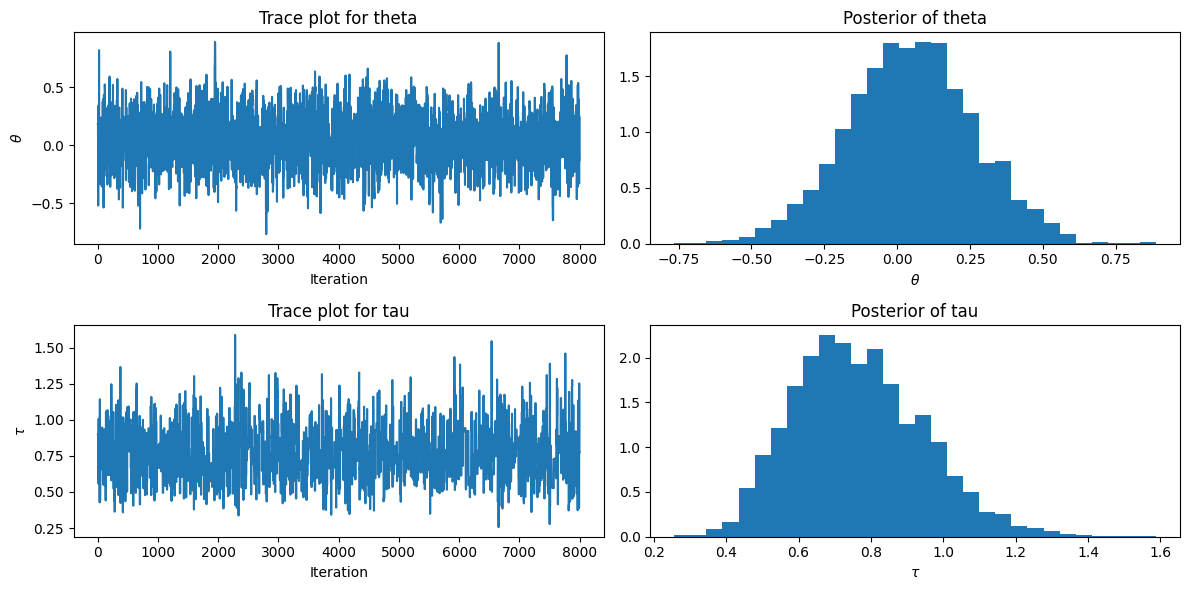

Posterior summaries:
Theta: mean = 0.047, median = 0.049
Tau:   mean = 0.764, median = 0.748

95% Equal-Tailed Credible Intervals:
Theta: [-0.383, 0.480]
Tau:   [0.455, 1.150]


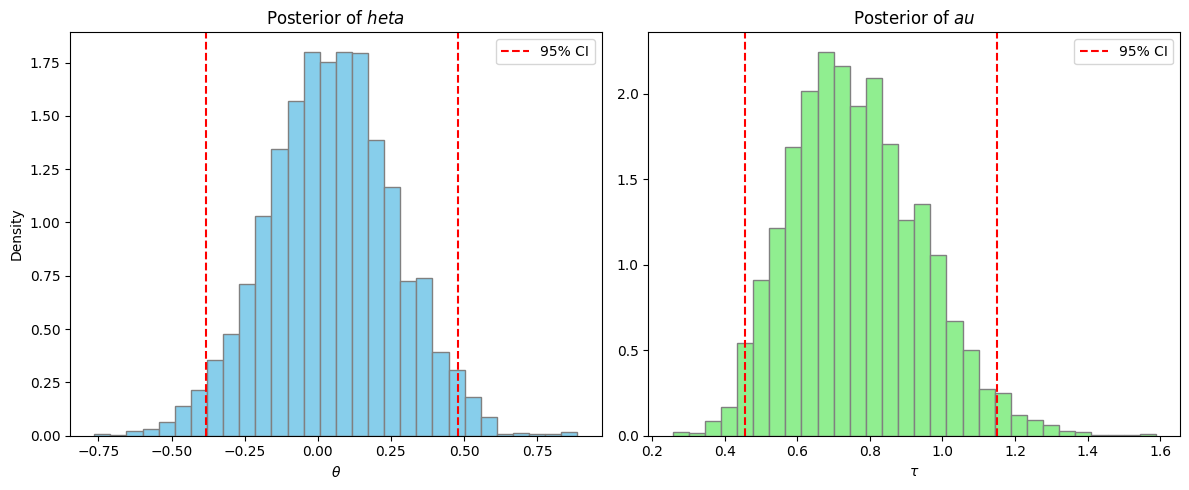

In [8]:
#Q1:

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(123)

# Generate data: n=30 observations from N(0,1)
n = 30
x = stats.norm(loc=0, scale=1).rvs(size=n)
xbar = np.mean(x)

# Number of iterations and storage
G = 10000
theta = np.zeros(G)
tau   = np.zeros(G)

# Initialize the chain
theta[0] = 10  # a poor starting value
tau[0] = 1.0     # starting value for tau

# Proposal standard deviation for theta (to be tuned)
sigma_theta = 0.5

# To record acceptance rates
accept_theta = 0
accept_tau = 0

# Metropolis-within-Gibbs sampler
for g in range(1, G):
    # ---- Update theta given current tau ----
    current_theta = theta[g-1]
    current_tau   = tau[g-1]

    # Propose a new theta from a random-walk proposal
    theta_prop = stats.norm.rvs(loc=current_theta, scale=sigma_theta)

    # Calculate the sum-of-squared residuals for current and proposed theta
    ssr_current = np.sum((x - current_theta)**2)
    ssr_prop    = np.sum((x - theta_prop)**2)

    # Compute the log acceptance ratio (the tau^(n/2) cancels)
    log_ratio_theta = -0.5 * current_tau * (ssr_prop - ssr_current)

    # Accept or reject
    if np.log(np.random.rand()) < log_ratio_theta:
        theta_new = theta_prop
        accept_theta += 1
    else:
        theta_new = current_theta
    theta[g] = theta_new

    # ---- Update tau given new theta ----
    # Use the prior as an independent proposal:
    # p(tau) = tau * exp(-tau)   ==> tau ~ Gamma(2,1)
    tau_prop = stats.gamma.rvs(a=2, scale=1)

    # With theta fixed at theta_new, compute the current and proposed log-target:
    # log(pi(tau|theta,x)) ∝ (n/2+1)*log(tau) - (0.5*ssr + 1)*tau
    ssr_theta = np.sum((x - theta_new)**2)
    log_target_current = (n/2 + 1) * np.log(current_tau) - (0.5 * ssr_theta + 1) * current_tau
    log_target_prop    = (n/2 + 1) * np.log(tau_prop)    - (0.5 * ssr_theta + 1) * tau_prop

    # Since the proposal density is the prior (Gamma(2,1)), include the proposal density terms:
    log_q_current = stats.gamma.logpdf(current_tau, a=2, scale=1)
    log_q_prop    = stats.gamma.logpdf(tau_prop, a=2, scale=1)

    log_ratio_tau = log_target_prop - log_target_current + log_q_current - log_q_prop

    # Accept or reject the proposed tau
    if np.log(np.random.rand()) < log_ratio_tau:
        tau_new = tau_prop
        accept_tau += 1
    else:
        tau_new = current_tau
    tau[g] = tau_new

# Print acceptance rates
print("Acceptance rate for theta update: {:.2f}%".format(100 * accept_theta / G))
print("Acceptance rate for tau update:   {:.2f}%".format(100 * accept_tau / G))

# Discard burn-in and plot the chains
burnin = 2000

plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.plot(theta[burnin:])
plt.xlabel("Iteration")
plt.ylabel(r"$\theta$")
plt.title("Trace plot for theta")

plt.subplot(2,2,2)
plt.hist(theta[burnin:], bins=30, density=True)
plt.xlabel(r"$\theta$")
plt.title("Posterior of theta")

plt.subplot(2,2,3)
plt.plot(tau[burnin:])
plt.xlabel("Iteration")
plt.ylabel(r"$\tau$")
plt.title("Trace plot for tau")

plt.subplot(2,2,4)
plt.hist(tau[burnin:], bins=30, density=True)
plt.xlabel(r"$\tau$")
plt.title("Posterior of tau")

plt.tight_layout()
plt.show()


# --- Additional Code for Bayesian Inference and Credible Intervals ---

# Discard burn-in samples
theta_post = theta[burnin:]
tau_post   = tau[burnin:]

# Compute summary statistics
theta_mean = np.mean(theta_post)
theta_median = np.median(theta_post)
tau_mean = np.mean(tau_post)
tau_median = np.median(tau_post)

print("Posterior summaries:")
print("Theta: mean = {:.3f}, median = {:.3f}".format(theta_mean, theta_median))
print("Tau:   mean = {:.3f}, median = {:.3f}".format(tau_mean, tau_median))

# Compute the 95% equal-tailed credible intervals using np.percentile
theta_ci = np.percentile(theta_post, [2.5, 97.5])
tau_ci   = np.percentile(tau_post,   [2.5, 97.5])

print("\n95% Equal-Tailed Credible Intervals:")
print("Theta: [{:.3f}, {:.3f}]".format(theta_ci[0], theta_ci[1]))
print("Tau:   [{:.3f}, {:.3f}]".format(tau_ci[0], tau_ci[1]))


# --- Optionally, overlay the credible intervals on the histograms ---

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(theta_post, bins=30, density=True, color='skyblue', edgecolor='gray')
plt.axvline(theta_ci[0], color='red', linestyle='--', label='95% CI')
plt.axvline(theta_ci[1], color='red', linestyle='--')
plt.xlabel(r"$\theta$")
plt.ylabel("Density")
plt.title("Posterior of theta")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(tau_post, bins=30, density=True, color='lightgreen', edgecolor='gray')
plt.axvline(tau_ci[0], color='red', linestyle='--', label='95% CI')
plt.axvline(tau_ci[1], color='red', linestyle='--')
plt.xlabel(r"$\tau$")
plt.title("Posterior of tau")
plt.legend()

plt.tight_layout()
plt.show()

Q1:

So we expect Theta to equal 0 and Tau to equal 1. As we can see this Gibbs-Within-Hastings sampling algorith does a very good job of reaching these values.

Acceptance rate for theta update: 42.73%
Acceptance rate for tau update:   67.25%

Posterior summaries:
Theta: mean = 0.033, 95% CI = [-0.371, 0.467]
Tau:   mean = 0.779, 95% CI = [0.453, 1.228]


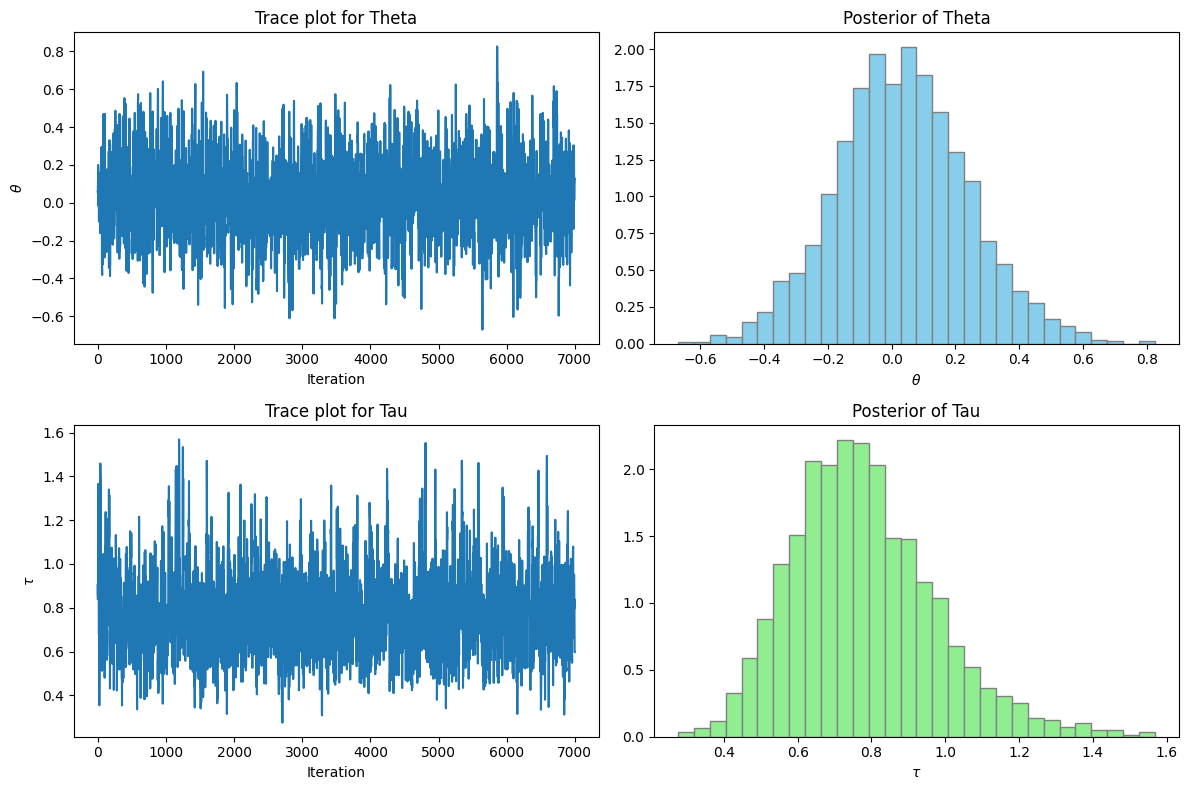

In [11]:
# Q2

np.random.seed(123)

# Generate data: n = 30 observations from N(0,1)
n = 30
x = stats.norm(loc=0, scale=1).rvs(size=n)
xbar = np.mean(x)

G = 10000  # total number of iterations
theta = np.zeros(G)
tau   = np.zeros(G)

# Initialize the chain.
# (Starting at a "poor" value for theta can illustrate the sampler's convergence.)
theta[0] = 10  # a poor starting value
tau[0]   = 1.0

# Proposal scales:
sigma_theta = 0.5  # for the random walk on theta
s_tau = 0.2        # for the dependent (truncated normal) proposal for tau

# Record acceptance rates
accept_theta = 0
accept_tau = 0

# -------------------------
# 2. Metropolis-within-Gibbs Sampling
# -------------------------
for g in range(1, G):
    # --- Update theta given current tau ---
    current_theta = theta[g-1]
    current_tau = tau[g-1]

    # Propose a new theta using a symmetric random walk:
    theta_prop = stats.norm.rvs(loc=current_theta, scale=sigma_theta)

    # Likelihood contributions (for theta, given tau)
    #   L(theta) ∝ exp[-0.5 * tau * sum((x - theta)^2)]
    ssr_current = np.sum((x - current_theta)**2)
    ssr_prop    = np.sum((x - theta_prop)**2)
    log_lik_current = -0.5 * current_tau * ssr_current
    log_lik_prop    = -0.5 * current_tau * ssr_prop

    # --- Non-Normal Prior for theta: Use a Cauchy prior ---
    # p(theta) = 1/[pi * (1 + theta^2)]  (centered at 0, scale = 1)
    log_prior_current = np.log(stats.cauchy.pdf(current_theta, loc=0, scale=1))
    log_prior_prop    = np.log(stats.cauchy.pdf(theta_prop, loc=0, scale=1))

    # Compute log acceptance ratio for theta:
    log_ratio_theta = (log_lik_prop + log_prior_prop) - (log_lik_current + log_prior_current)

    if np.log(np.random.rand()) < log_ratio_theta:
        theta[g] = theta_prop
        accept_theta += 1
    else:
        theta[g] = current_theta

    # --- Update tau given new theta ---
    # Now use the updated theta from this iteration.
    new_theta = theta[g]
    ssr_theta = np.sum((x - new_theta)**2)

    # The target (posterior) for tau (up to constants) is:
    #   p(tau | theta, x) ∝ tau^(n/2 + 1) * exp[-(0.5*ssr_theta + 1) * tau]
    # (Here the '1' in the rate term comes from a Gamma(2,1) prior on tau.)
    def log_target_tau(t):
        return (n/2 + 1)*np.log(t) - (0.5*ssr_theta + 1)*t

    # --- Dependent Proposal for tau: truncated normal ---
    # Current tau:
    current_tau = tau[g-1]
    # Define the parameters for the forward proposal density:
    a_forward = -current_tau/s_tau  # lower bound in standardized units
    # Propose tau_prop from a truncated normal with support (0, ∞):
    tau_prop = stats.truncnorm.rvs(a=a_forward, b=np.inf, loc=current_tau, scale=s_tau)

    # Calculate the proposal density q(tau_prop | current_tau):
    log_q_forward = stats.truncnorm.logpdf(tau_prop, a=a_forward, b=np.inf, loc=current_tau, scale=s_tau)

    # Calculate the reverse proposal density q(current_tau | tau_prop):
    a_reverse = -tau_prop/s_tau
    log_q_reverse = stats.truncnorm.logpdf(current_tau, a=a_reverse, b=np.inf, loc=tau_prop, scale=s_tau)

    # Log-targets:
    log_target_current = log_target_tau(current_tau)
    log_target_prop = log_target_tau(tau_prop)

    # Compute log acceptance ratio for tau:
    log_ratio_tau = log_target_prop - log_target_current + log_q_reverse - log_q_forward

    if np.log(np.random.rand()) < log_ratio_tau:
        tau[g] = tau_prop
        accept_tau += 1
    else:
        tau[g] = current_tau

# -------------------------
# 3. Posterior Summaries and Plots
# -------------------------
print("Acceptance rate for theta update: {:.2f}%".format(100 * accept_theta / G))
print("Acceptance rate for tau update:   {:.2f}%".format(100 * accept_tau / G))

# Discard burn-in samples
burnin = 3000
theta_post = theta[burnin:]
tau_post   = tau[burnin:]

# Compute summary statistics and 95% equal-tailed credible intervals
theta_mean = np.mean(theta_post)
theta_ci   = np.percentile(theta_post, [2.5, 97.5])
tau_mean   = np.mean(tau_post)
tau_ci     = np.percentile(tau_post, [2.5, 97.5])

print("\nPosterior summaries:")
print("Theta: mean = {:.3f}, 95% CI = [{:.3f}, {:.3f}]".format(theta_mean, theta_ci[0], theta_ci[1]))
print("Tau:   mean = {:.3f}, 95% CI = [{:.3f}, {:.3f}]".format(tau_mean, tau_ci[0], tau_ci[1]))

# Trace plots and histograms for visualizing the posterior samples
plt.figure(figsize=(12, 8))

plt.subplot(2,2,1)
plt.plot(theta_post)
plt.xlabel("Iteration")
plt.ylabel(r"$\theta$")
plt.title("Trace plot for Theta")

plt.subplot(2,2,2)
plt.hist(theta_post, bins=30, density=True, color='skyblue', edgecolor='gray')
plt.xlabel(r"$\theta$")
plt.title("Posterior of Theta")

plt.subplot(2,2,3)
plt.plot(tau_post)
plt.xlabel("Iteration")
plt.ylabel(r"$\tau$")
plt.title("Trace plot for Tau")

plt.subplot(2,2,4)
plt.hist(tau_post, bins=30, density=True, color='lightgreen', edgecolor='gray')
plt.xlabel(r"$\tau$")
plt.title("Posterior of Tau")

plt.tight_layout()
plt.show()


Q2.

Analytic full conditionals are not necessary as long as you can evaluate the target densities. Metropolis-Hastings steps can be embedded in a Gibbs sampler to update parameters whose full conditionals are not available in closed form.
This flexibility is especially useful when using non-normal prior or when the model structure makes analytic derivations impossible.


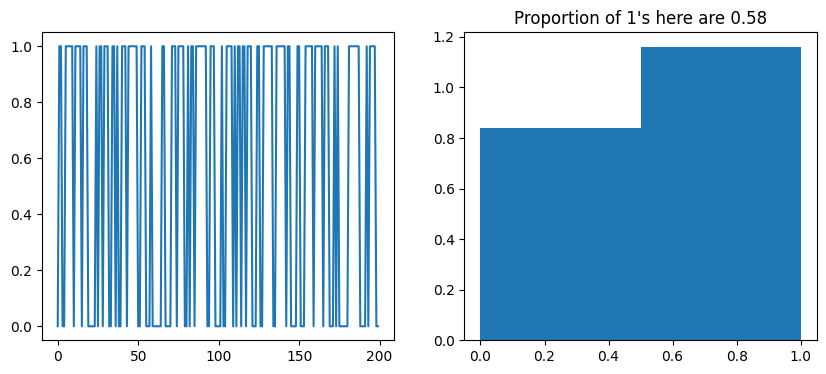

In [9]:
# Here's what it looks like if we flip coins
# with transition probabilties defind by A sequentially
# and sure enough we recover 1/3 and 2/3 for 0 and 1 respectively
K = np.array([[.5,.25],[.5,.75]])
T = 200
s_t = np.zeros(T, dtype=int)
for t in range(1, T):
    s_t[t] = int(stats.uniform().rvs() < K[:,s_t[t-1]][1])

fig,ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(s_t)
ax[1].hist(s_t, bins=2, density=True)
ax[1].set_title("Proportion of 1's here are "+str(s_t.mean()));

In [ ]:
# Here's what it looks like if we flip coins
# with transition probabilties defind by K
# and sure enough we recover 1/3 and 2/3 for 0 and 1 respectively
T = 10000
s_t = np.zeros(T, dtype=int)
for t in range(1, T):
    s_t[t] = int(stats.uniform().rvs() < K[:,s_t[t-1]][1])

state0_run_length = []
state1_run_length = []
run_length = 1
for t in range(1,T):
    if s_t[t]==s_t[t-1]:
        run_length += 1
    else:
        if s_t[t-1] == 0:
            state0_run_length += [run_length]
        else:
            state1_run_length += [run_length]
        run_length = 1

fig,ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(state0_run_length)
ax[0].set_title("0 run lengths on aveage here are "+str(np.mean(state0_run_length).round(3)))
ax[1].hist(state1_run_length)
ax[1].set_title("1 run lengths on aveage here are "+str(np.mean(state1_run_length).round(3)));
